<a href="https://colab.research.google.com/github/hasdasda/HoctheoPhamDinhKhanh/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.6 MB/s eta 0:00:00


In [3]:
! pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires pillow==10.2.0, but you have pillow 11.1.0 which is incompatible.


# Inference

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [5]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [6]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [7]:
detector = Predictor(config)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
18533it [00:09, 1902.09it/s]
/usr/local/lib/python3.10/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user 

In [8]:
# ! wget https://vocr.vn/data/vietocr/sample.zip
# ! unzip  -qq -o sample.zip

In [9]:
# ! ls sample | shuf |head -n 5

In [10]:
# img = './sample/031189003299.jpeg'
# img = Image.open(img)
# plt.imshow(img)
# s = detector.predict(img)
# s

# Download sample dataset

In [11]:
# ! wget https://vocr.vn/data/vietocr/data_line.zip

In [12]:
# ! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [13]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [32]:
config = Cfg.load_config_from_name('vgg_transformer')

In [54]:

dataset_params = {
    'name':'hw',
    'data_root':'/content/drive/MyDrive/Data',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':1,
         'valid_every':1,
          'iters':10,
          'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
          'export': './weights/transformerocr.pth',
          'metrics': 1,
           'batch_size' : 1
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [55]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 1,
  'print_every': 1,
  'valid_every': 1,
  'iters': 10,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 1},
 'dataset': {'name': 'hw',
  'data_root': '/content/drive/MyDrive/Data',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 

You should train model from our pretrained

In [57]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


ZeroDivisionError: float division by zero

Save model configuration for inference, load_config_from_file

In [47]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

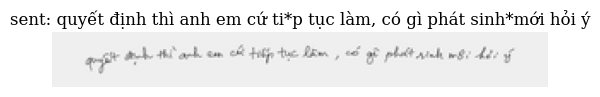

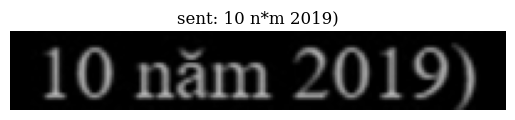

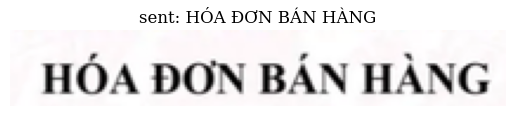

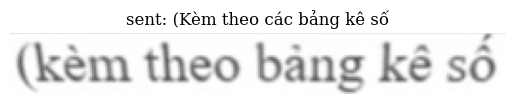

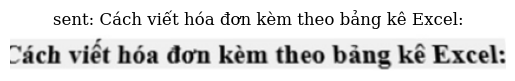

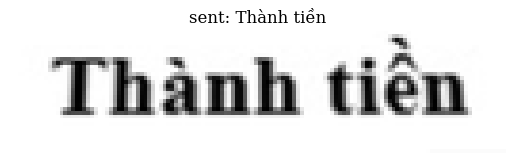

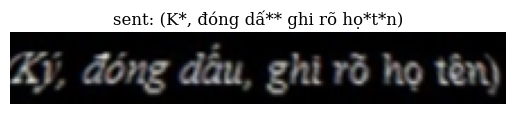

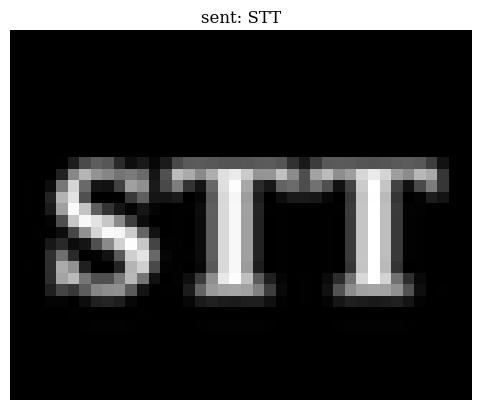

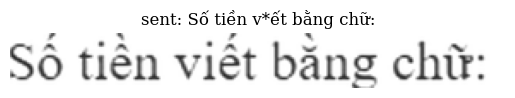

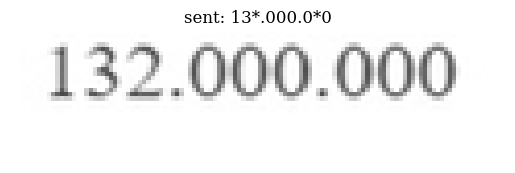

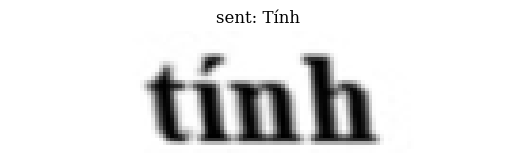

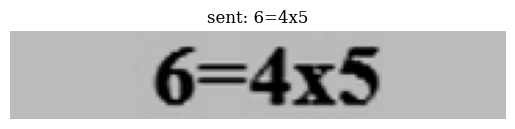

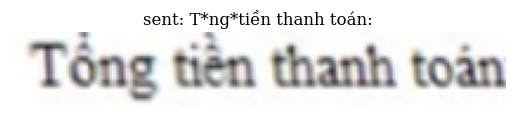

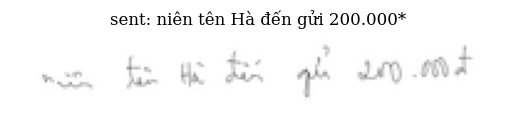

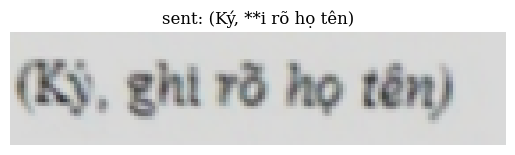

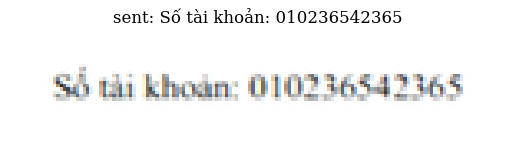

In [48]:
trainer.visualize_dataset()

Train now

In [49]:
trainer.train()

iter: 000001 - train loss: 2.467 - lr: 1.23e-05 - load time: 0.08 - gpu time: 0.27
iter: 000001 - valid loss: 0.979 - acc full seq: 0.0000 - acc per char: 0.3273
iter: 000002 - train loss: 1.947 - lr: 1.32e-05 - load time: 0.00 - gpu time: 0.17
iter: 000002 - valid loss: 0.986 - acc full seq: 0.0000 - acc per char: 0.3273
iter: 000003 - train loss: 0.817 - lr: 1.47e-05 - load time: 0.00 - gpu time: 0.17
iter: 000003 - valid loss: 0.995 - acc full seq: 0.0000 - acc per char: 0.3273
iter: 000004 - train loss: 2.189 - lr: 1.67e-05 - load time: 0.00 - gpu time: 0.14
iter: 000004 - valid loss: 0.994 - acc full seq: 0.0000 - acc per char: 0.3273
iter: 000005 - train loss: 0.949 - lr: 1.93e-05 - load time: 0.00 - gpu time: 0.14
iter: 000005 - valid loss: 0.997 - acc full seq: 0.0000 - acc per char: 0.3273
iter: 000006 - train loss: 0.838 - lr: 2.25e-05 - load time: 0.00 - gpu time: 0.14
iter: 000006 - valid loss: 1.003 - acc full seq: 0.0000 - acc per char: 0.3273
iter: 000007 - train loss: 1

Visualize prediction from our trained model


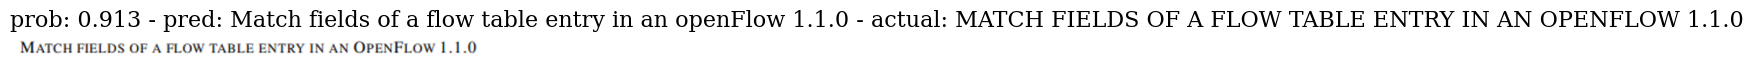

In [39]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [40]:
trainer.precision()

(0.0, 0.3090909)

In [52]:
import os

file_path = './weights/transformerocr.pth'
if os.path.exists(file_path):
    print(f"File tồn tại tại {file_path}.")
else:
    print("File không tồn tại. Kiểm tra lại đường dẫn hoặc quá trình huấn luyện.")

File không tồn tại. Kiểm tra lại đường dẫn hoặc quá trình huấn luyện.
